In [956]:
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import astropy as py
import pyspeckit
import astropy.units as u
import aplpy

from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.modeling.models import custom_model
from astropy.modeling.fitting import LevMarLSQFitter
from astropy import constants
from astropy.wcs import WCS
from astropy.nddata.utils import Cutout2D 
from astropy.coordinates import Galactic

from scipy import constants as const
from scipy import optimize
from scipy import ndimage

from spectral_cube import SpectralCube

from pvextractor import extract_pv_slice,Path, PathFromCenter

from pyspeckit.cubes.mapplot import MapPlotter

%matplotlib inline
plt.rcParams["figure.figsize"] = (14,8)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize'] = 'xx-large'
plt.rcParams['ytick.labelsize'] = 'xx-large'
plt.rcParams.update({"text.usetex": False,
                     "font.family": "serif",
                     'xtick.direction': 'out',
                     'ytick.direction': 'in'})

my_figsize = (5,5)

#cutout_size = u.Quantity((5, 5), u.arcsec)
cutout_size = u.Quantity((15, 15), u.arcsec)

In [957]:
def Line(x, a):
    return a*x

In [958]:
def arcsec_au(d,theta) :
    return (d*theta*u.au)

In [959]:
#file = 'Documents/SO/B335_SO_vlsr_5snr_min_vel_blue.fits'

#Coords_B335 = SkyCoord("19h37m0.905s","7d34m9.56s")
Coords_B335 = SkyCoord("19h37m0.9s","7d34m9.6s")
#Coords_B335 = SkyCoord("19h37m01.0s","7d34m11s")

distance = 164.5 * u.pc

vlsr = 8.3

In [960]:
def load_cutout(file_in, is_hdu=False):
    if is_hdu==False:
        hdu = fits.open(file_in)[0]
    else:
        hdu = file_in
    # Make the cutout, including the WCS
    cutout = Cutout2D(hdu.data, position=Coords_B335, size=cutout_size, wcs=WCS(hdu.header))
    
    hdu.data = cutout.data
    hdu.header.update(cutout.wcs.to_header())
    return hdu

In [961]:
file_N2Hp ='Documents/B335/B335_N2Hp_vlsr_3snr_vel_red.fits'
file_H13COp = 'Documents/H13CO/B335_H13CO_32_vlsr_5snr_vel_red_3comp.fits'
file_C18O = 'Documents/C18O/B335_C18O_vlsr_5snr_vel_red.fits'
file_CS = 'Documents/CS/B335_CS_vlsr_5snr_min_vel_red.fits'
file_SO = 'Documents/SO/B335_SO_vlsr_5snr_min_vel_red.fits'

file = [file_N2Hp, file_H13COp, file_C18O, file_CS, file_SO]

# CS

In [962]:
hdu = load_cutout(file_CS)

wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

In [963]:
length = 10 * u.arcsec
angle = 67 * u.deg
width = 2

PV_cut_CS = PathFromCenter(center=Coords_B335, length=length, angle=angle, width=width)

#PV_cut = Path([(92., 325.), (97., 310.), (148., 293.)])

#PV_cut_bis = PathFromCenter(center=Coords_B335, length=10*u.arcsec, angle=68*u.deg, width=2)

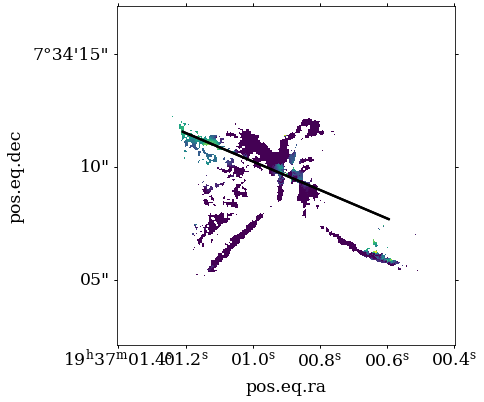

In [964]:
fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection = wcs)
plt.imshow(hdu.data, vmin = 8.6, vmax = 9.5, origin='lower')

PV_cut_CS.show_on_axis(ax=ax, spacing=1)
    
#plt.ylim(250,400)
#plt.xlim(50,200)

plt.tight_layout()

In [965]:
x,y = PV_cut_CS.sample_points(wcs=wcs,spacing=1)

In [966]:
x,y

(array([402.20107734, 401.2805725 , 400.36006765, 399.4395628 ,
        398.51905795, 397.59855311, 396.67804826, 395.75754341,
        394.83703856, 393.91653372, 392.99602887, 392.07552402,
        391.15501917, 390.23451433, 389.31400948, 388.39350463,
        387.47299978, 386.55249494, 385.63199009, 384.71148524,
        383.79098039, 382.87047555, 381.9499707 , 381.02946585,
        380.108961  , 379.18845616, 378.26795131, 377.34744646,
        376.42694161, 375.50643677, 374.58593192, 373.66542707,
        372.74492222, 371.82441738, 370.90391253, 369.98340768,
        369.06290283, 368.14239799, 367.22189314, 366.30138829,
        365.38088344, 364.4603786 , 363.53987375, 362.6193689 ,
        361.69886405, 360.77835921, 359.85785436, 358.93734951,
        358.01684466, 357.09633982, 356.17583497, 355.25533012,
        354.33482527, 353.41432043, 352.49381558, 351.57331073,
        350.65280588, 349.73230104, 348.81179619, 347.89129134,
        346.97078649, 346.05028165, 345.

In [967]:
Offset = arcsec_au(d=distance.value,
                   theta=(((np.arange(len(x)) - len(x)//2).astype(float)*hdu.header['CDELT2'])*u.deg).to(u.arcsec).value)

In [968]:
Vel_CS = []
Off_CS = []

for i in range(len(x)) :
    
    Vel_CS.append(np.abs(hdu.data[int(y[i]),int(x[i])]))
    Off_CS.append(Offset[i].value)

In [969]:
Vel_CS

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 8.86101631463693,
 nan,
 8.915722669387863,
 nan,
 nan,
 8.820106848707328,
 nan,
 8.924134797423172,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 8.333282295551129,
 8.366481548047018,
 nan,
 nan,
 8.58556980014414,
 nan,
 8.587226740844729,
 8.459545009270164,
 nan,
 nan,
 nan,
 8.465172622718416,
 nan,
 nan,
 8.49790244316718,
 8.50018586867034,
 8.510645069774943,
 8.498391670246704,
 8.480418660874442,
 8.483062702185618,
 8.494652550354612,
 8.481553767060616,
 8.50145436415

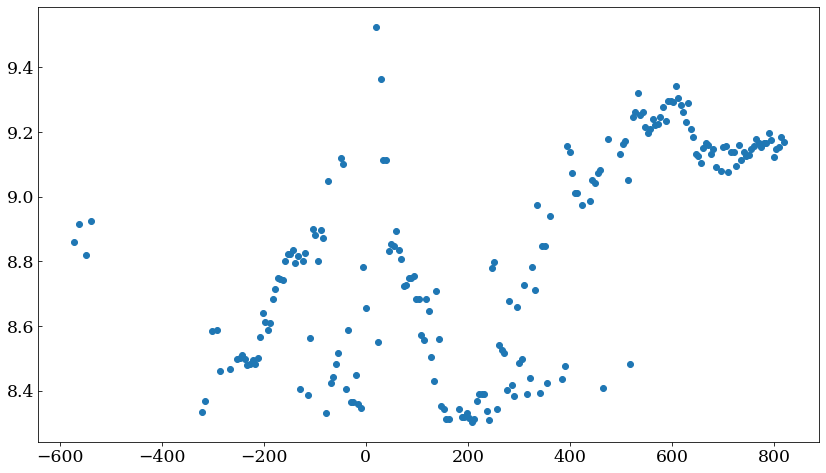

In [970]:
plt.scatter(Off_CS, Vel_CS)

In [971]:
test_CS = []
position_CS = []

for i in range(len(Vel_CS)) :
    
    if np.isnan(Vel_CS[i]) == False and Off_CS[i] > 580 :
        
        test_CS.append(Vel_CS[i]-vlsr)
        position_CS.append(Off_CS[i])
            

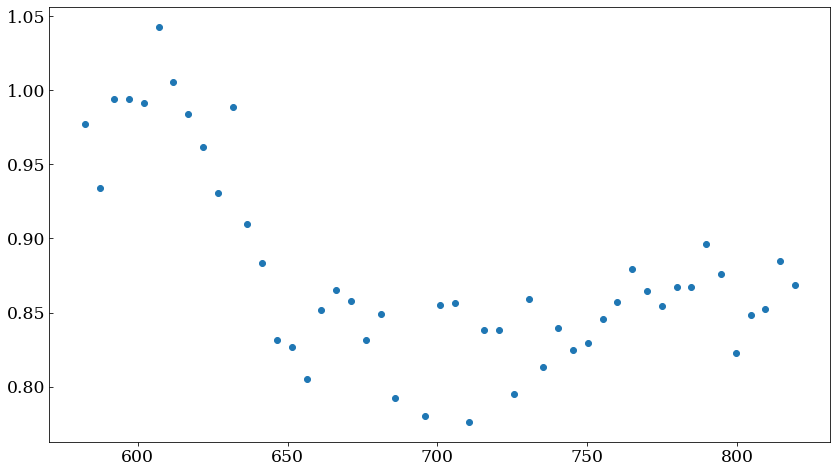

In [972]:
plt.scatter(position_CS, test_CS)

# SO

In [973]:
cutout_size = u.Quantity((3.5, 3.5), u.arcsec)

hdu = load_cutout(file_SO)

wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

In [974]:
length = 2 * u.arcsec
angle = 70 * u.deg
width = 2

PV_cut_SO = PathFromCenter(center=Coords_B335, length=length, angle=angle, width=width)

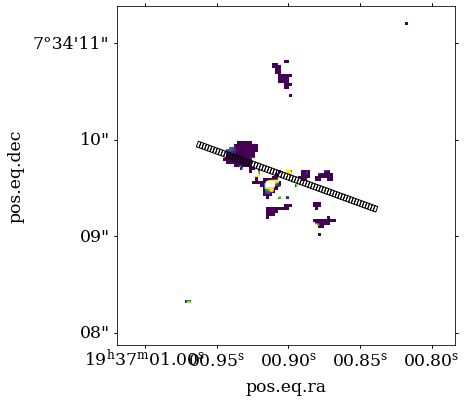

In [975]:
fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection = wcs)
plt.imshow(hdu.data, vmin = 8.6, vmax = 9.2, origin='lower')

PV_cut_SO.show_on_axis(ax=ax, spacing=1)
    
#plt.ylim(250,400)
#plt.xlim(50,200)

plt.tight_layout()

In [976]:
x,y = PV_cut_SO.sample_points(wcs=wcs,spacing=1)

In [977]:
Offset = arcsec_au(d=distance.value,
                   theta=(((np.arange(len(x)) - len(x)//2).astype(float)*hdu.header['CDELT2'])*u.deg).to(u.arcsec).value)

In [978]:
Vel_SO = []
Off_SO = []

for i in range(len(x)) :
    
    Vel_SO.append(np.abs(hdu.data[int(y[i]),int(x[i])]))
    Off_SO.append(Offset[i].value)

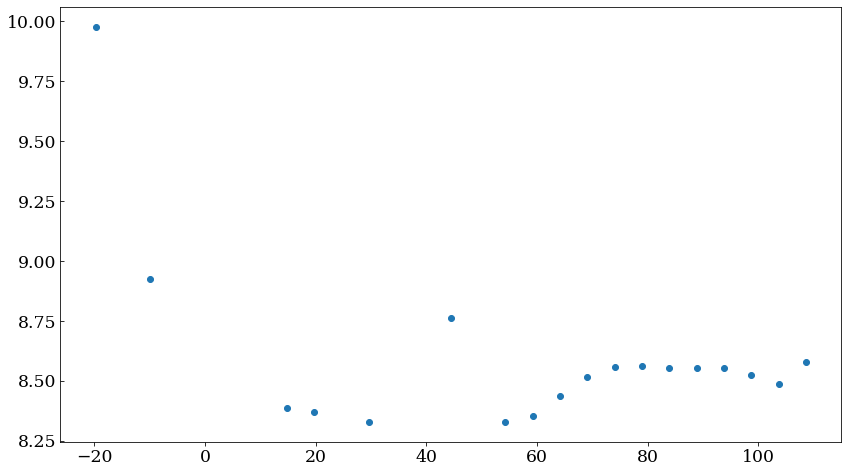

In [979]:
plt.scatter(Off_SO, Vel_SO)

In [980]:
test_SO = []
position_SO = []

for i in range(len(Vel_SO)) :
    
    if np.isnan(Vel_SO[i]) == False and Off_SO[i] > 70 and Vel_SO[i] > 8.5:
        
        test_SO.append(Vel_SO[i]-vlsr)
        position_SO.append(Off_SO[i])  

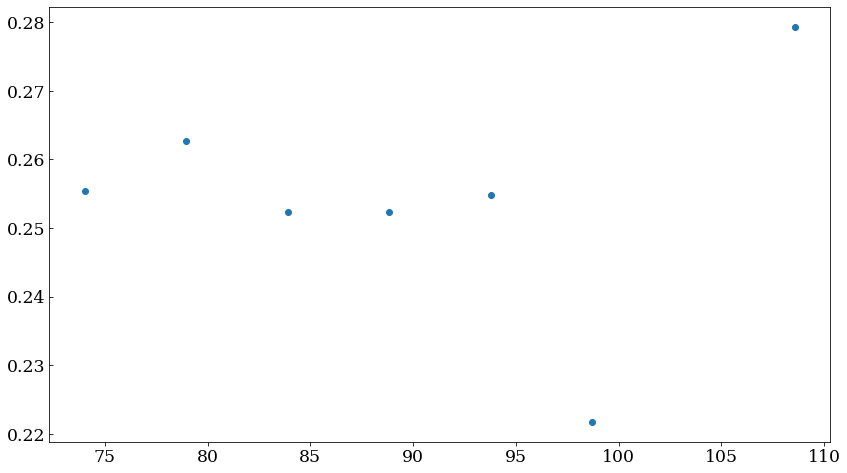

In [981]:
plt.scatter(position_SO, test_SO)

# N2Hp

In [982]:
cutout_size = u.Quantity((120, 120), u.arcsec)

hdu = load_cutout(file_N2Hp)

wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

In [983]:
length = 100 * u.arcsec
angle = 70 * u.deg
width = 2

PV_cut_N2Hp = PathFromCenter(center=Coords_B335, length=length, angle=angle, width=width)

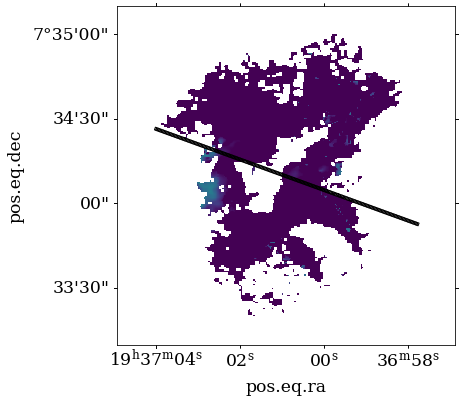

In [984]:
fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection = wcs)
plt.imshow(hdu.data, vmin = 8.6, vmax = 9, origin='lower')

PV_cut_N2Hp.show_on_axis(ax=ax, spacing=1)
    
#plt.ylim(250,400)
#plt.xlim(50,200)

plt.tight_layout()

In [985]:
x,y = PV_cut_N2Hp.sample_points(wcs=wcs,spacing=1)

In [986]:
Offset = arcsec_au(d=distance.value,
                   theta=(((np.arange(len(x)) - len(x)//2).astype(float)*hdu.header['CDELT2'])*u.deg).to(u.arcsec).value)

In [987]:
Vel_N2Hp = []
Off_N2Hp = []

for i in range(len(x)) :
    
    Vel_N2Hp.append(np.abs(hdu.data[int(y[i]),int(x[i])]))
    Off_N2Hp.append(Offset[i].value)

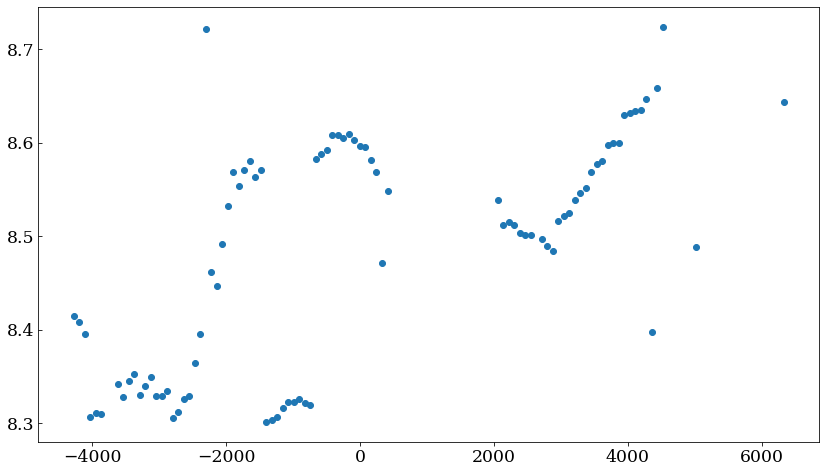

In [988]:
plt.scatter(Off_N2Hp, Vel_N2Hp)

In [1018]:
test_N2Hp = []
position_N2Hp = []

for i in range(len(Vel_N2Hp)) :
    
    if np.isnan(Vel_N2Hp[i]) == False and 2750 > Off_N2Hp[i] > 2000 and Vel_N2Hp[i] > 8.5:
        
        test_N2Hp.append(Vel_N2Hp[i]-vlsr)
        position_N2Hp.append(Off_N2Hp[i]) 

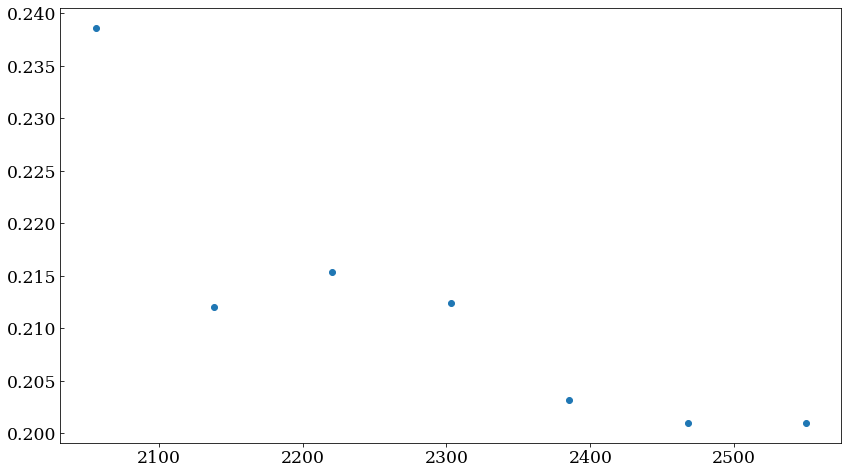

In [1019]:
plt.scatter(position_N2Hp, test_N2Hp)

# H13CO

In [991]:
cutout_size = u.Quantity((30, 30), u.arcsec)

hdu = load_cutout(file_H13COp)

wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

In [992]:
length = 20 * u.arcsec
angle = 77 * u.deg
width = 2

PV_cut_H13COp = PathFromCenter(center=Coords_B335, length=length, angle=angle, width=width)

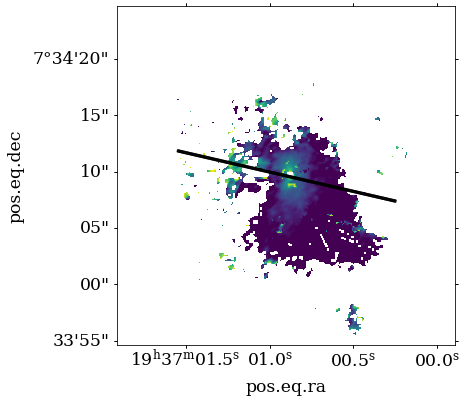

In [993]:
fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection = wcs)
plt.imshow(hdu.data, vmin = 8.6, vmax = 9, origin='lower')

PV_cut_H13COp.show_on_axis(ax=ax, spacing=1)
    
#plt.ylim(250,400)
#plt.xlim(50,200)

plt.tight_layout()

In [994]:
x,y = PV_cut_H13COp.sample_points(wcs=wcs,spacing=1)

In [995]:
Offset = arcsec_au(d=distance.value,
                   theta=(((np.arange(len(x)) - len(x)//2).astype(float)*hdu.header['CDELT2'])*u.deg).to(u.arcsec).value)

In [996]:
Vel_H13COp = []
Off_H13COp = []

for i in range(len(x)) :
    
    Vel_H13COp.append(np.abs(hdu.data[int(y[i]),int(x[i])]))
    Off_H13COp.append(Offset[i].value)

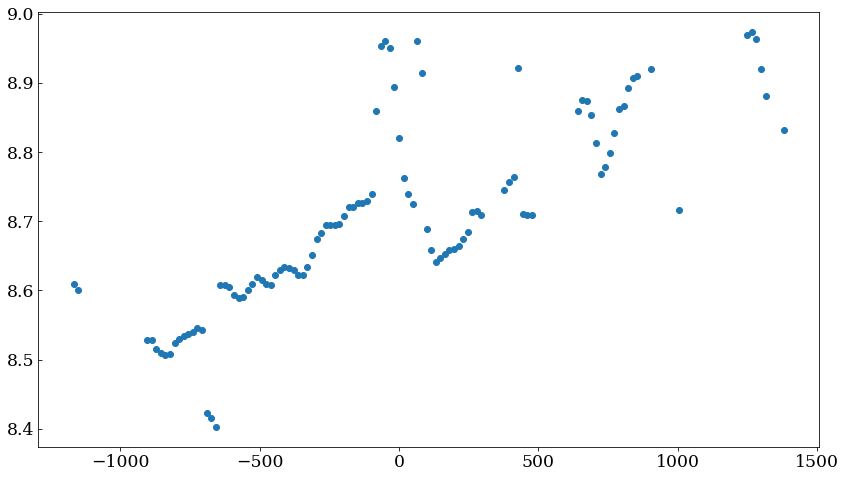

In [997]:
plt.scatter(Off_H13COp, Vel_H13COp)

In [998]:
test_H13COp = []
position_H13COp = []

for i in range(len(Vel_H13COp)) :
    
    if np.isnan(Vel_H13COp[i]) == False and 1000 > Off_H13COp[i] > 500 and Vel_H13COp[i] > 8.5:
        
        test_H13COp.append(Vel_H13COp[i]-vlsr)
        position_H13COp.append(Off_H13COp[i]) 

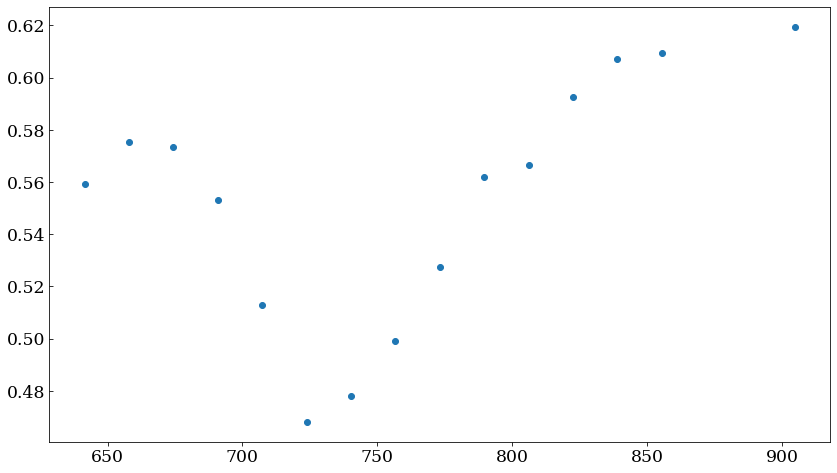

In [999]:
plt.scatter(position_H13COp, test_H13COp)

# C18O

In [1000]:
cutout_size = u.Quantity((20, 20), u.arcsec)

hdu = load_cutout(file_C18O)

wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

In [1001]:
length = 20 * u.arcsec
angle = 67 * u.deg
width = 2

PV_cut_C18O = PathFromCenter(center=Coords_B335, length=length, angle=angle, width=width)

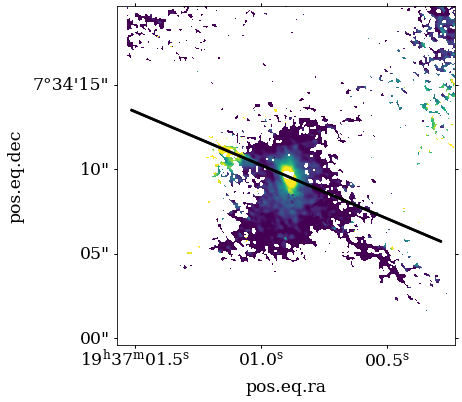

In [1002]:
fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection = wcs)
plt.imshow(hdu.data, vmin = 8.6, vmax = 9, origin='lower')

PV_cut_C18O.show_on_axis(ax=ax, spacing=1)
    
#plt.ylim(250,400)
#plt.xlim(50,200)

plt.tight_layout()

In [1003]:
x,y = PV_cut_C18O.sample_points(wcs=wcs,spacing=1)

In [1004]:
Offset = arcsec_au(d=distance.value,
                   theta=(((np.arange(len(x)) - len(x)//2).astype(float)*hdu.header['CDELT2'])*u.deg).to(u.arcsec).value)

In [1005]:
Vel_C18O = []
Off_C18O = []

for i in range(len(x)) :
    
    Vel_C18O.append(np.abs(hdu.data[int(y[i]),int(x[i])]))
    Off_C18O.append(Offset[i].value)

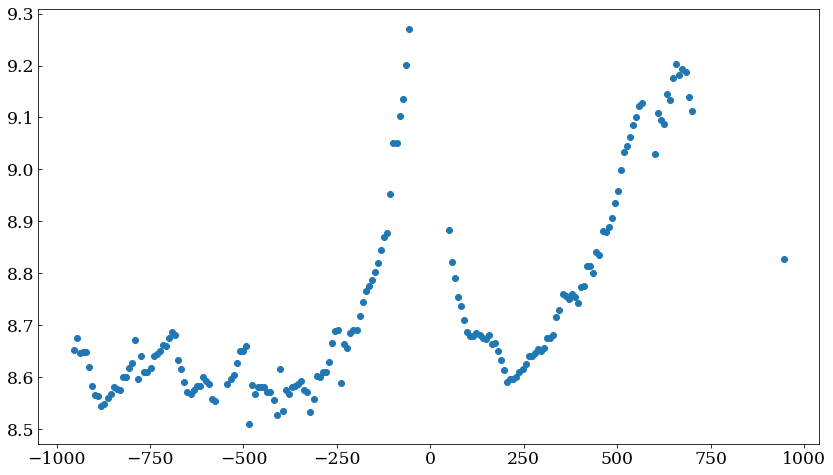

In [1006]:
plt.scatter(Off_C18O, Vel_C18O)

In [1007]:
test_C18O = []
position_C18O = []

for i in range(len(Vel_C18O)) :
    
    if np.isnan(Vel_C18O[i]) == False and 800 > Off_C18O[i] > 600 and Vel_C18O[i] > 8.5:
        
        test_C18O.append(Vel_C18O[i]-vlsr)
        position_C18O.append(Off_C18O[i])

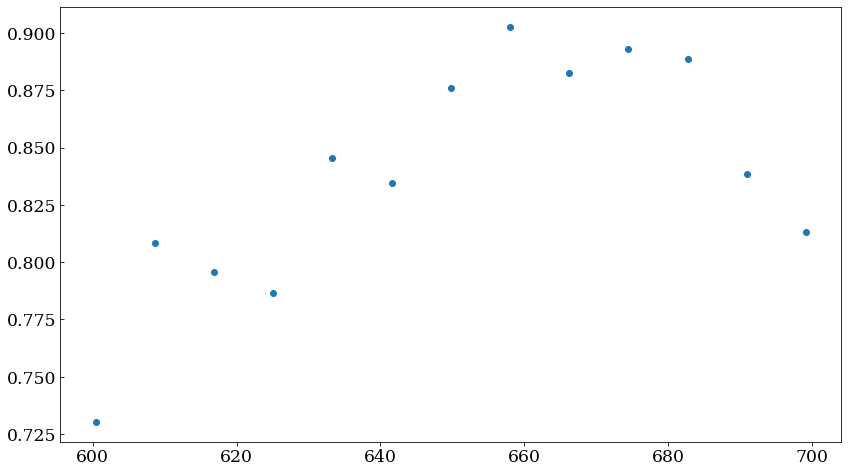

In [1008]:
plt.scatter(position_C18O, test_C18O)

In [1052]:
position = np.array(position_C18O + position_CS + position_H13COp + position_N2Hp)

In [1053]:
test = np.array(test_C18O + test_CS + test_H13COp + test_N2Hp)

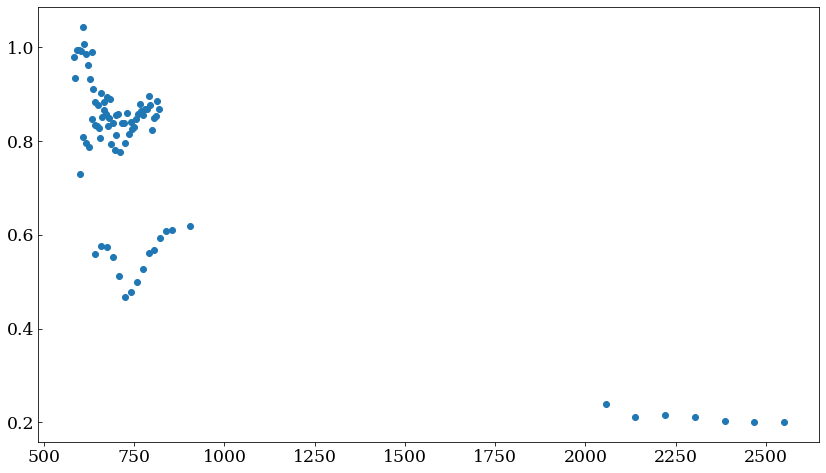

In [1022]:
plt.scatter(position, test)

In [1024]:
def PowerLaw(x, alpha, beta, xb, A):
    
    y1 = (A * (x/xb)**(-alpha)) [x < xb]
    y2 = (A * (x/xb)**(-beta) ) [x >= xb]
    y  = np.concatenate((y1,y2))
    
    return y

In [1035]:
popt_power, pcov_power = optimize.curve_fit(PowerLaw, np.abs(position), test, p0=np.asarray([0.5, 0.5, 1000, 0.1]), 
                                method='trf', bounds=([0.01,0.01,10,0.1],[1.5,1.5,2500,8.4]) )

In [1036]:
popt_power

array([  0.953764  ,   1.3208801 , 740.25000466,   0.76818453])

In [1037]:
pos = np.linspace(500, 2750, 100)

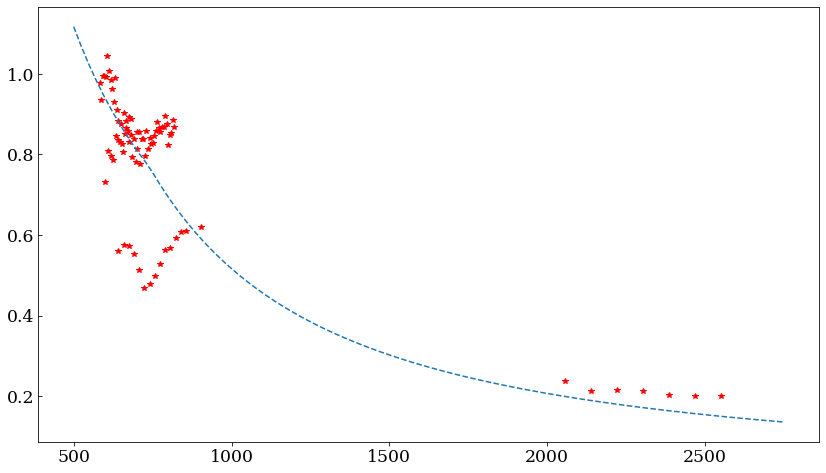

In [1038]:
plt.plot(np.abs(position), test, 'r*')
plt.plot(pos, PowerLaw(np.abs(pos), *popt_power), '--')

In [1042]:
import numpy as np
import astropy.units as u
from scipy import optimize
from astropy.constants import G


#
# Implementation of stream lines using the prescription from
# Mendoza et al. (2009)  doi:10.1111/j.1365-2966.2008.14210.x
#

def v_k(radius, mass=0.5 * u.Msun):
    """
    Velocity term that is repeated in all velocity component.
    It corresponds to v_k in Mendoza+(2009)
    """
    return np.sqrt(G * mass / radius).to(u.km / u.s)


def r_cent(mass=0.5 * u.Msun, omega=1e-14 / u.s, r0=1e4 * u.au):
    """
    Centrifugal radius or disk radius  in the Ulrich (1976)'s model.
    r_u in Mendoza's nomenclature.
    :param mass: Central mass for the protostar
    :param omega: Angular speed at the r0 radius
    :param r0: Initial radius of the streamline
    :return:
    """
    return (r0 ** 4 * omega ** 2 / (G * mass)).to(u.au)


def theta_abs(theta, r_to_rc=0.1, theta0=np.radians(30), ecc=1.,
              orb_ang=90*u.deg):
    """
    function to determine theta numerically by finding the root of a function
    This is equation (9) in Mendoza+(2009)
    :param theta: angle in radians
    :param r_to_rc: radius in units of the centrifugal radius
    :param theta0: Initial angle of the streamline
    :param ecc: eccentricity of the orbit (equation 6)
    :param orb_ang: angle in the orbital motion (equation 7)
    :return: returns the difference between the radius and the predicted one,
           a value of 0 corresponds to a proper streamline
    """
    cos_ratio = np.cos(theta) / np.cos(theta0)
    if cos_ratio > 1.:
        # print('theta0={0}, theta_try={1} --> bad arccos calculation'.format(theta0, theta))
        return np.nan
    xi = np.arccos(cos_ratio) + orb_ang.to(u.rad).value
    geom = np.sin(theta0)**2 / (1 - ecc * np.cos(xi))
    return np.abs(r_to_rc - geom)


def get_dphi(theta, theta0=np.radians(30)):
    """
    Gets the difference in Phi.
    :param theta: radians
    :param theta0: radians
    :return difference in Phi angle, in radians
    """
    return np.arccos(np.tan(theta0) / np.tan(theta))


def stream_line(r, mass=0.5 * u.Msun, r0=1e4 * u.au, theta0=30 * u.deg,
                omega=1e-14 / u.s, v_r0=0 * u.km / u.s):
    """
    It calculates the stream line following Mendoza et al. (2009)
    It takes the radial velocity and rotation at the streamline
    initial radius and it describes the entire trajectory.
    :param r:
    :param mass:
    :param r0:
    :param theta0:
    :param phi0:
    :param omega:
    :param v_r0: Initial radial velocity
    :return: theta
    """
    # convert theta0 into radians
    rad_theta0 = theta0.to(u.rad).value
    rc = r_cent(mass=mass, omega=omega, r0=r0)
    print("rc={0}".format(rc))
    theta = np.zeros_like(r.value) + np.nan
    # mu and nu are dimensionless
    mu = (rc / r0).decompose().value
    nu = (v_r0 * np.sqrt(rc / (G * mass))).decompose().value
    epsilon = nu**2 + mu**2 * np.sin(theta0)**2 - 2 * mu
    ecc = np.sqrt(1 + epsilon * np.sin(theta0)**2)
    orb_ang = np.arccos((1 - mu * np.sin(theta0)**2) / ecc)
    # the first element in the streamline is the starting point
    theta[0] = rad_theta0
    # Initial guess at largest radius is theta0 +- epsilon towards the midplane
    if rad_theta0 < np.radians(90):
        theta_i = rad_theta0 + 1e-7
        theta_bracket = [(rad_theta0, np.pi/2.)]
    else:
        theta_i = rad_theta0 - 1e-7
        theta_bracket = [(np.pi/2., rad_theta0)]
    for ind in np.arange(1, len(r)):
        r_i = (r[ind] / rc).decompose().value
        if r_i > 0.5:
            # print('initial guess of theta_i = {0}'.format(theta_i))
            result = optimize.minimize(theta_abs, theta_i,
                                       bounds=theta_bracket,
                                   args=(r_i, rad_theta0, ecc, orb_ang))
            theta_i = result.x
            theta[ind] = theta_i
    return theta * u.rad


def stream_line_vel(r, theta, mass=0.5*u.Msun, r0=1e4*u.au, theta0=30*u.deg,
                omega=1e-14/u.s, v_r0=0*u.km/u.s):
    """
    It calculates the velocity along the stream line following Mendoza+(2009)
    It takes the radial velocity and rotation at the streamline
    initial radius and it describes the entire trajectory.
    :param theta:
    :param r:
    :param mass:
    :param r0:
    :param theta0:
    :param phi0:
    :param omega:
    :param v_r0: Initial radial velocity
    :return: v_r, v_theta, v_phi in units of km/s
    """
    rc = r_cent(mass=mass, omega=omega, r0=r0)
    r_to_rc = (r / rc).decompose().value
    v_k0 = v_k(rc, mass=mass)
    # mu and nu are dimensionless
    mu = (rc / r0).decompose().value
    nu = (v_r0 * np.sqrt(rc / (G * mass))).decompose().value
    epsilon = nu**2 + mu**2 * np.sin(theta0)**2 - 2 * mu
    ecc = np.sqrt(1 + epsilon*np.sin(theta0)**2)
    orb_ang = np.arccos((1 - mu * np.sin(theta0)**2) / ecc)
    cos_ratio = np.cos(theta) / np.cos(theta0)
    xi = np.arccos(cos_ratio) + orb_ang.to(u.rad)#.value
    #
    v_r_all = -ecc * np.sin(theta0) * np.sin(xi) / r_to_rc /(1 - ecc*np.cos(xi))
    v_theta_all = np.sin(theta0) / np.sin(theta) / r_to_rc \
                  * np.sqrt(np.cos(theta0)**2 - np.cos(theta)**2)
    v_phi_all = np.sin(theta0)**2 / np.sin(theta) / r_to_rc

    return v_r_all * v_k0, v_theta_all * v_k0, v_phi_all * v_k0


def rotate_xyz(x, y, z, inc=30 * u.deg, pa=30 * u.deg):
    """
    Rotate on inclination and PA
    x-axis and y-axis are on the plane on the sky,
    z-axis is the 
    Rotation around x is inclination angle
    Rotation around y is PA angle
    Using example matrices as described in:
    https://en.wikipedia.org/wiki/3D_projection
    :param x: cartesian x-coordinate, in the direction of decreasing RA
    :param y: cartesian y-coordinate, in the direction away of the observer
    :param z: cartesian z-coordinate, in the direction of increasing Dec.
    :param inc: Inclination angle. 0=no change
    :param pa: Change the PA angle. Measured from North due East.
    :return: new x, y, and z-coordinates as observed on the sky, with the
    same units as the input ones.
    """
    xyz = np.column_stack((x, y, z))
    rot_inc = np.array([[1, 0, 0],
                        [0, np.cos(inc), np.sin(inc)],
                        [0, -np.sin(inc), np.cos(inc)]])
    rot_pa = np.array([[np.cos(pa), 0, -np.sin(pa)],
                       [0, 1, 0],
                       [np.sin(pa), 0, np.cos(pa)]])
    xyz_new = rot_pa.dot(rot_inc.dot(xyz.T))
    return xyz_new[0], xyz_new[1], xyz_new[2]


def xyz_stream(mass=0.5*u.Msun, r0=1e4*u.au, theta0=30*u.deg,
               phi0=15*u.deg, omega=1e-14/u.s, v_r0=0*u.km/u.s,
               inc=0*u.deg, pa=0*u.deg, rmin=None):
    """
    it gets xyz coordinates and velocities for a stream line.
    They are also rotated in PA and inclination along the line of sight.
    This is a wrapper around stream_line() and rotate_xyz()
    Spherical into cartesian transformation is done for position and velocity
    using:
    https://en.wikipedia.org/wiki/Vector_fields_in_cylindrical_and_spherical_coordinates
    :param mass: Central mass
    :param r0: Initial radius of streamline
    :param theta0: Initial polar angle of streamline
    :param phi0: Initial azimuthal angle of streamline
    :param omega: Angular rotation. (defined positive)
    :param v_r0: Initial radial velocity of the streamline
    :param inc: inclination with respect of line-of-sight, inc=0 is an edge-on-disk
    :param pa: Position angle of the rotation axis, measured due East from North. This is usually estimated from the outflow PA, or the disk PA-90deg.
    :param rmin: smallest radius for calculation
    :return:
    """
    rc = r_cent(mass=mass, omega=omega, r0=r0)
    if rc > r0:
        print('Centrifugal radius is larger than start of streamline')
    r = np.arange(r0.to(u.au).value, rc.to(u.au).value*0.5, step=-10) * u.au
    theta = stream_line(r, mass=mass, r0=r0, theta0=theta0,
                        omega=omega, v_r0=v_r0)
    d_phi = get_dphi(theta, theta0=theta0)
    phi = phi0 + d_phi
    #
    v_r, v_theta, v_phi = stream_line_vel(r, theta, mass=mass, r0=r0,
                                          theta0=theta0, omega=omega, v_r0=v_r0)
    v_x = v_r * np.sin(theta) * np.cos(phi) \
          + v_theta * np.cos(theta) * np.cos(phi) \
          - v_phi * np.sin(phi)
    v_y = v_r * np.sin(theta) * np.sin(phi) \
          + v_theta * np.cos(theta) * np.sin(phi) \
          + v_phi * np.cos(phi)
    v_z = v_r * np.cos(theta) \
          - v_theta * np.sin(theta)
    # Convert from spherical into cartesian coordinates
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    if rmin is not None:
        gd_rmin = (r > rmin)
        if gd_rmin.sum() > 0:
            return rotate_xyz(x[gd_rmin], y[gd_rmin], z[gd_rmin], inc=inc, pa=pa),\
                rotate_xyz(v_x[gd_rmin], v_y[gd_rmin], v_z[gd_rmin], inc=inc, pa=pa)
        else:
            return [np.nan], [np.nan], [np.nan], [np.nan], [np.nan], [np.nan]
    else:
        return rotate_xyz(x, y, z, inc=inc, pa=pa), \
               rotate_xyz(v_x, v_y, v_z, inc=inc, pa=pa)

In [1056]:
stream_line(r=100*u.au, mass = 0.05*u.M_sun)

rc=504.53883235222685 AU


TypeError: 'numpy.float64' object does not support item assignment